<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:60px; color:teal'><center> Titanic Classification  🚢 </center></h2> 


<img src='https://www.dgwgo.com/wp-content/uploads/2021/04/titanic.jpg'>

Using the Titanic dataset from [https://www.kaggle.com/c/titanic/data] Kaggle competition.]

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - # of siblings / spouses aboard the Titanic
- **Parch** (int) - # of parents and children aboard 
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
file_path = "D:\\psyliq\\DATA-SCIENCE-INTERNSHIP\\DATA SCIENCE - INTERNSHIP\\train.csv"
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.drop(['PassengerId', 'Cabin','Ticket', 'Name'], inplace =True, axis= 1)

The col having `PassengerId`, `Cabin` and `Name` of the Passenger are not relevant for the analysis.

In [5]:
num_col = df.select_dtypes(include='number').columns.tolist()
obj_col = df.select_dtypes(include='object').columns.tolist()
print(f'Numerical columns in the dataset: {num_col}')
print()
print(f'Object columns in the dataset: {obj_col}')

Numerical columns in the dataset: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Object columns in the dataset: ['Sex', 'Embarked']


# Finding Missing Values

In [6]:
missing_percentage = df.isnull().sum()*100/len(df)
missing_percentage = pd.DataFrame(missing_percentage)
missing_percentage.columns= ['missing_percentage']
missing_df = missing_percentage[missing_percentage.missing_percentage != 0].copy()
missing_df['missing_columns'] = missing_df.index
missing_df.reset_index(drop=True, inplace=True)
missing_df

,missing_percentage,missing_columns
0,19.865320,Age
1,0.224467,Embarked


In [7]:
# df['Age'].fillna(df['Age'].mean(), inplace=True)
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  
# df.isna().sum()

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
df.nunique().sort_values()

Survived      2
Sex           2
Pclass        3
Embarked      3
SibSp         7
Parch         7
Age          88
Fare        248
dtype: int64

In [10]:
cat_col=[]
for col in df.columns:
    if df[col].nunique()<=10:
        print(col, df[col].unique())
        cat_col.append(col)

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


Column Name : Pclass
Pclass
1    136
3    119
2     87
Name: count, dtype: int64


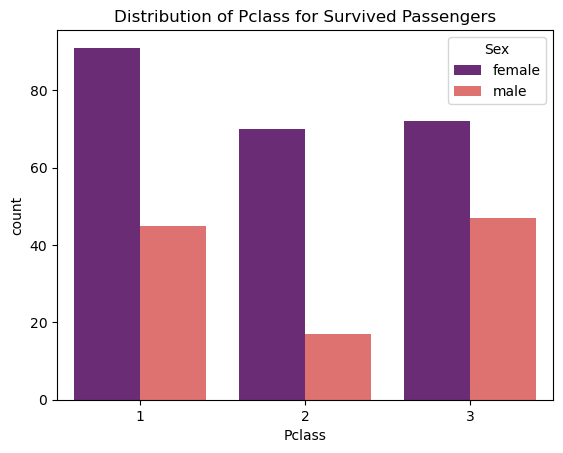

Column Name : Sex
Sex
female    233
male      109
Name: count, dtype: int64


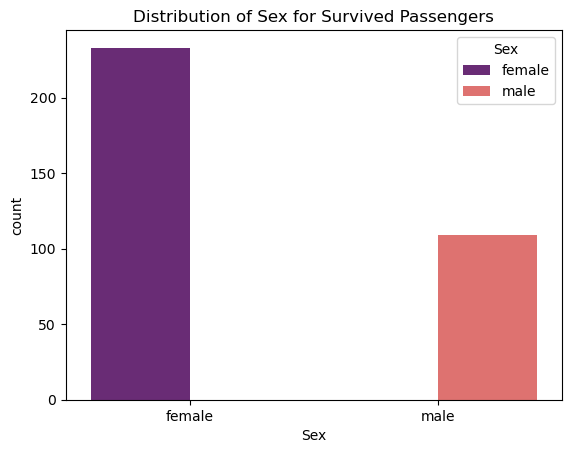

Column Name : SibSp
SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64


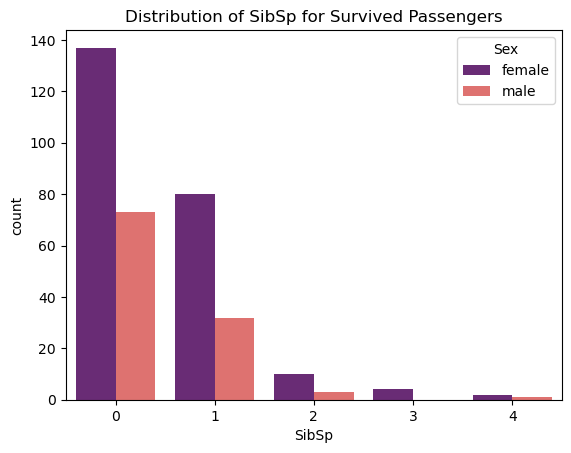

Column Name : Parch
Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64


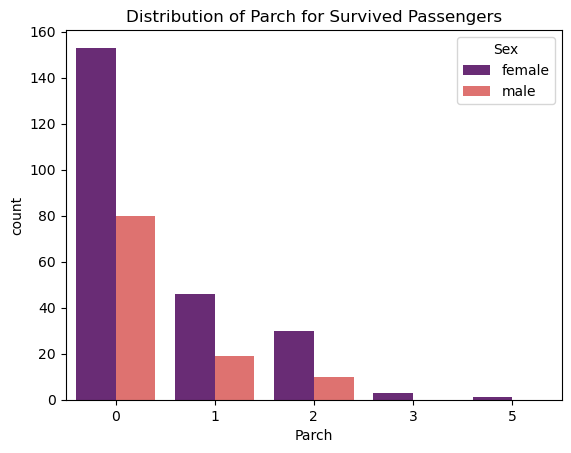

Column Name : Embarked
Embarked
S    217
C     93
Q     30
Name: count, dtype: int64


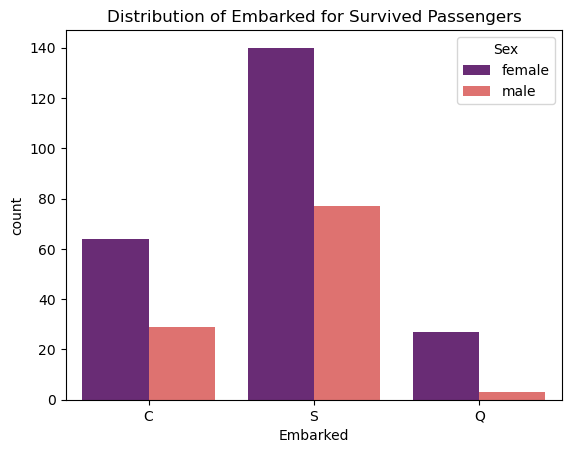

In [11]:
# 0 = No, 1 = Yes
survive = df[df.Survived ==1]
died = df[df.Survived ==0]

for col in cat_col[1:]:
    print(f'Column Name : {col}')
    print('==='*20)    
    print(survive[col].value_counts())
    
    sns.countplot(x=col, hue='Sex', data=survive, palette ='magma')
    plt.title(f'Distribution of {col} for Survived Passengers')
    plt.show()
    print('==='*20)

In [12]:
df['Family_size']= df.Parch + df.SibSp     #Parent-Child, Sibbling_Spouse
df.Family_size.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

Text(0.5, 1.0, 'Distribution of Famliy_Size for Survived and died Passengers')

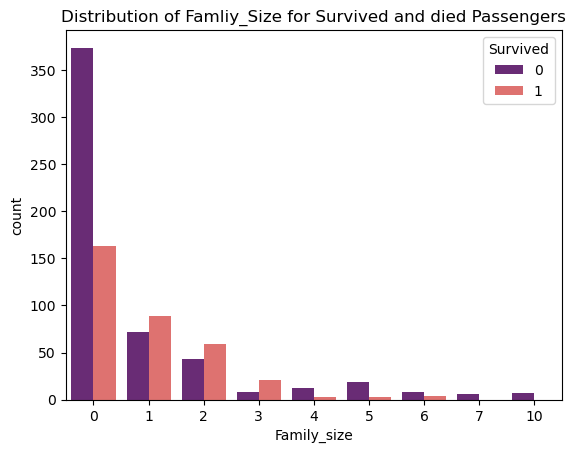

In [13]:
sns.countplot(x='Family_size', hue='Survived', data=df, palette ='magma')
plt.title(f'Distribution of Famliy_Size for Survived and died Passengers')

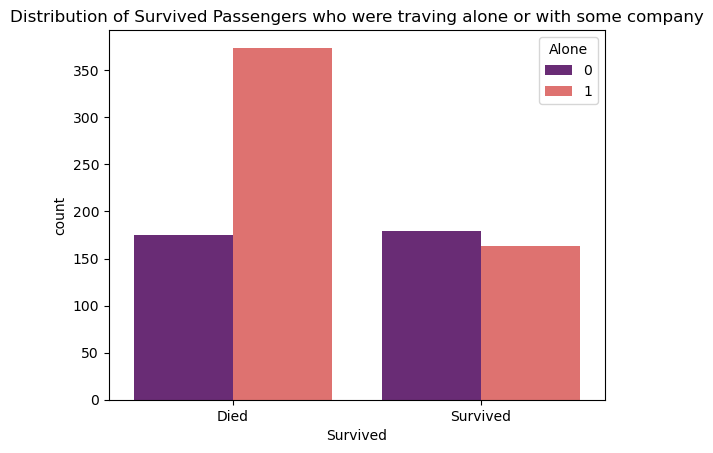

In [14]:
df['Alone'] = np.where(df['Family_size'] == 0 , 1, 0) # yes = 1, no=0
sns.countplot(x='Survived', hue='Alone', data=df, palette ='magma')
plt.title(f'Distribution of Survived Passengers who were traving alone or with some company')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()

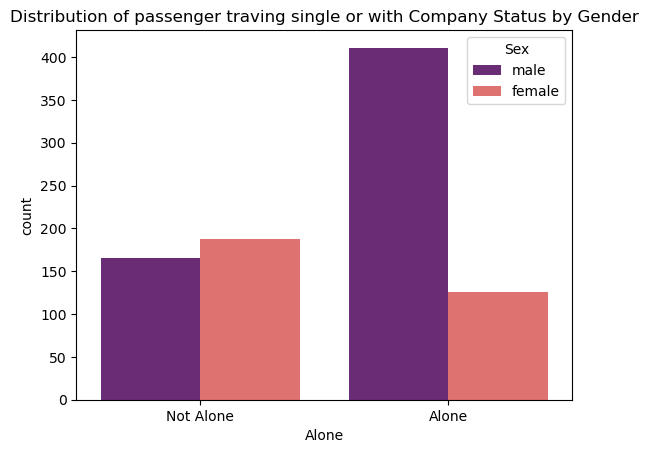

In [15]:
sns.countplot(x='Alone', hue='Sex', data=df, palette ='magma')  
plt.title('Distribution of passenger traving single or with Company Status by Gender')
plt.xticks([0, 1], ['Not Alone', 'Alone'])
plt.show()

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Alone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [17]:
df.drop(['SibSp','Parch','Family_size'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,NaN,23.4500,S,0
889,1,1,male,26.0,30.0000,C,1


In [18]:
df = df[['Pclass','Sex','Age','Embarked','Alone','Fare','Survived']]
df

,Pclass,Sex,Age,Embarked,Alone,Fare,Survived
0,3,male,22.0,S,0,7.2500,0
1,1,female,38.0,C,0,71.2833,1
2,3,female,26.0,S,1,7.9250,1
3,1,female,35.0,S,0,53.1000,1
4,3,male,35.0,S,1,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,S,1,13.0000,0
887,1,female,19.0,S,1,30.0000,1
888,3,female,NaN,S,0,23.4500,0
889,1,male,26.0,C,1,30.0000,1


In [19]:
survive = df[df.Survived ==1]
died = df[df.Survived ==0]

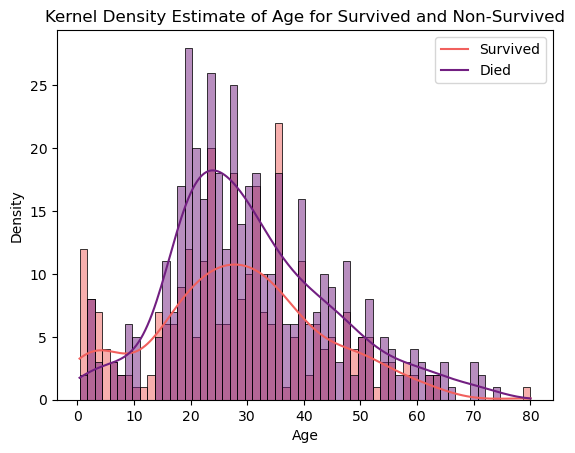

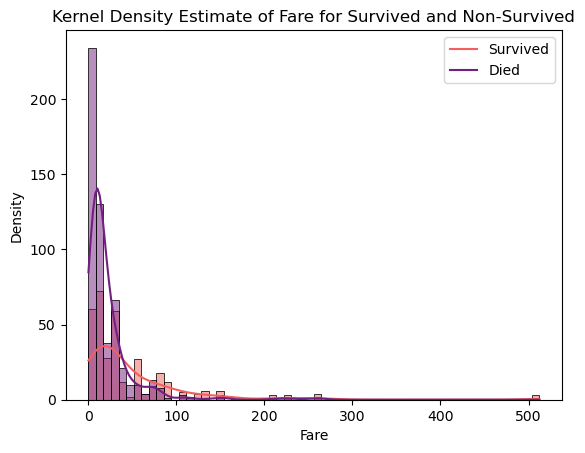

In [20]:
for col in ['Age', 'Fare']:
    
    sns.histplot(data=df, x=col, bins=60, kde=True, palette= 'magma', edgecolor='black', hue = 'Survived',legend= True)

    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimate of {col} for Survived and Non-Survived')
    plt.legend(labels=['Survived','Died'])
    plt.tight_layout
    plt.show()

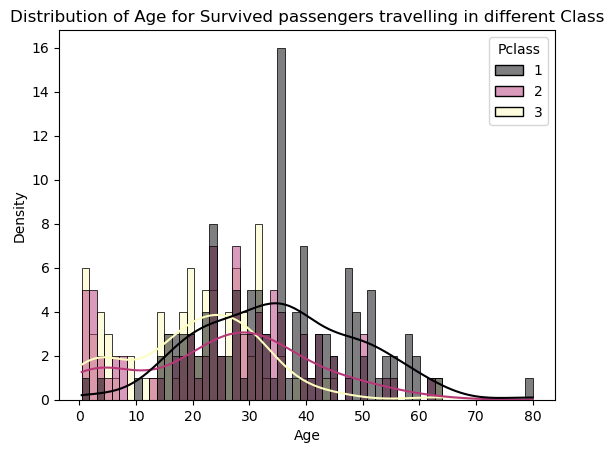

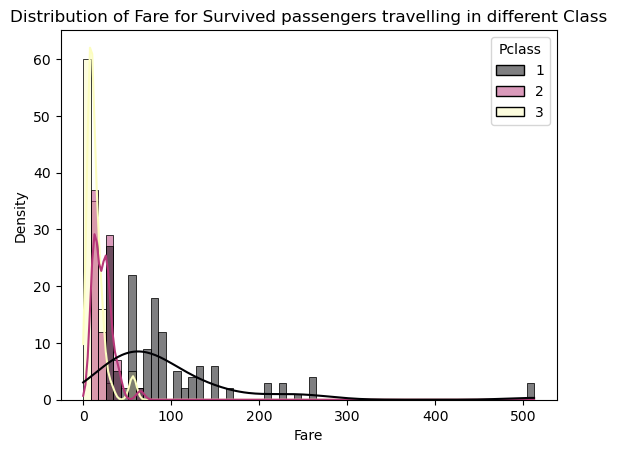

In [21]:
for col in ['Age', 'Fare']:
    
    sns.histplot(data=survive, x=col, bins=60, kde=True, palette= 'magma', edgecolor='black', hue = 'Pclass',legend= True)

    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.title(f'Distribution of {col} for Survived passengers travelling in different Class')
    #plt.legend(labels=['Survived','Died'])
    plt.tight_layout
    plt.show()

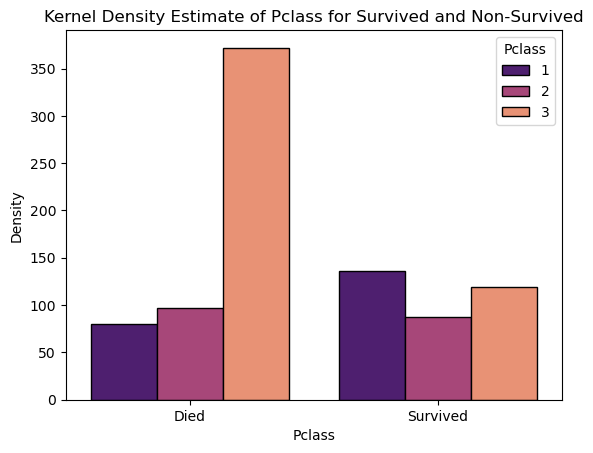

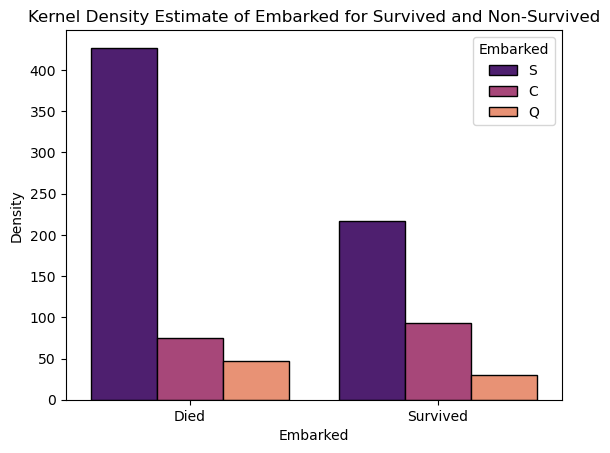

In [22]:
for col in ['Pclass', 'Embarked']:
    sns.countplot(data=df, x='Survived',  palette= 'magma', edgecolor='black', hue = col)

    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.xticks([0, 1], ['Died', 'Survived'])
    plt.title(f'Kernel Density Estimate of {col} for Survived and Non-Survived')
    #plt.legend(labels=['Survived','Died'])
    plt.tight_layout
    plt.show()

Most of the dead passengers are having Port of Embarkation from  `Southampton` and ticket `class #3`. Whereas most of the survived passengers are having Port of Embarkation from  `Southampton` and ticket `class #1`

<Axes: xlabel='Sex', ylabel='count'>

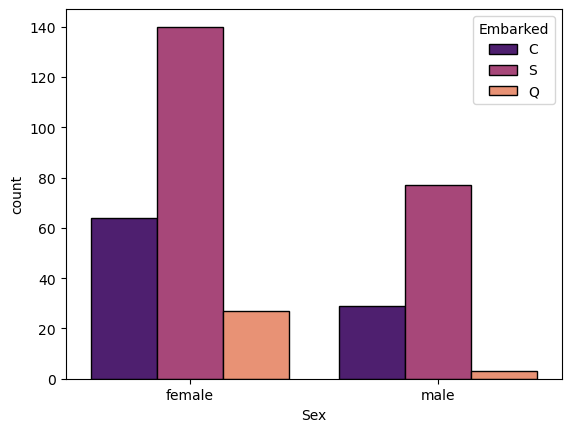

In [23]:
sns.countplot(data=survive, x='Sex',  palette= 'magma', edgecolor='black', hue = 'Embarked')


([<matplotlib.axis.XTick at 0x241596143d0>,
 [Text(0, 0, 'Died'), Text(1, 0, 'Survived')])

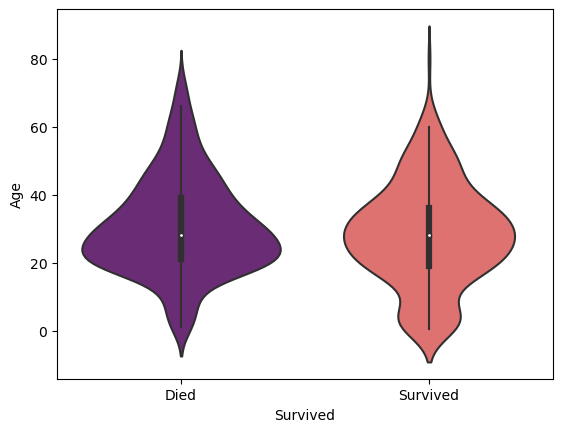

In [24]:
sns.violinplot(x='Survived', y='Age', data=df,palette='magma',)
plt.xticks([0, 1], ['Died', 'Survived'])


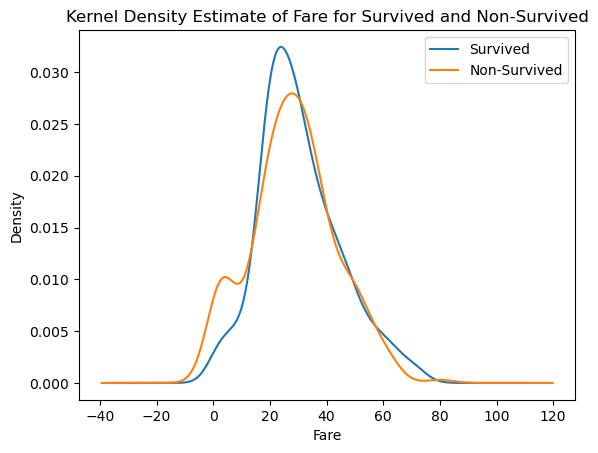

In [25]:
df[df.Survived ==0]['Age'].plot(kind='kde')
df[df.Survived ==1]['Age'].plot(kind='kde')

plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Fare for Survived and Non-Survived')
plt.legend(labels=['Survived', 'Non-Survived'])
plt.show()

<Axes: ylabel='count'>

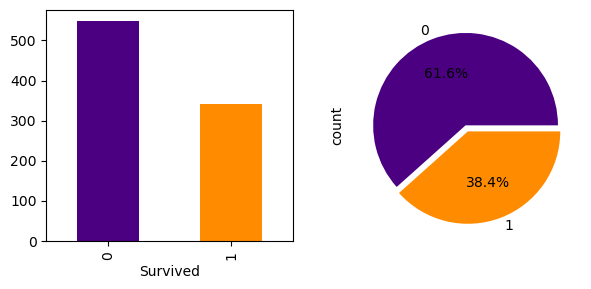

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
df.Survived.value_counts().plot(kind='bar', color=['indigo','darkorange'], ax=ax[0])
df.Survived.value_counts().plot(kind='pie', colors=['indigo','darkorange'], 
                                ax=ax[1],explode=[0, 0.07], autopct='%1.1f%%',)


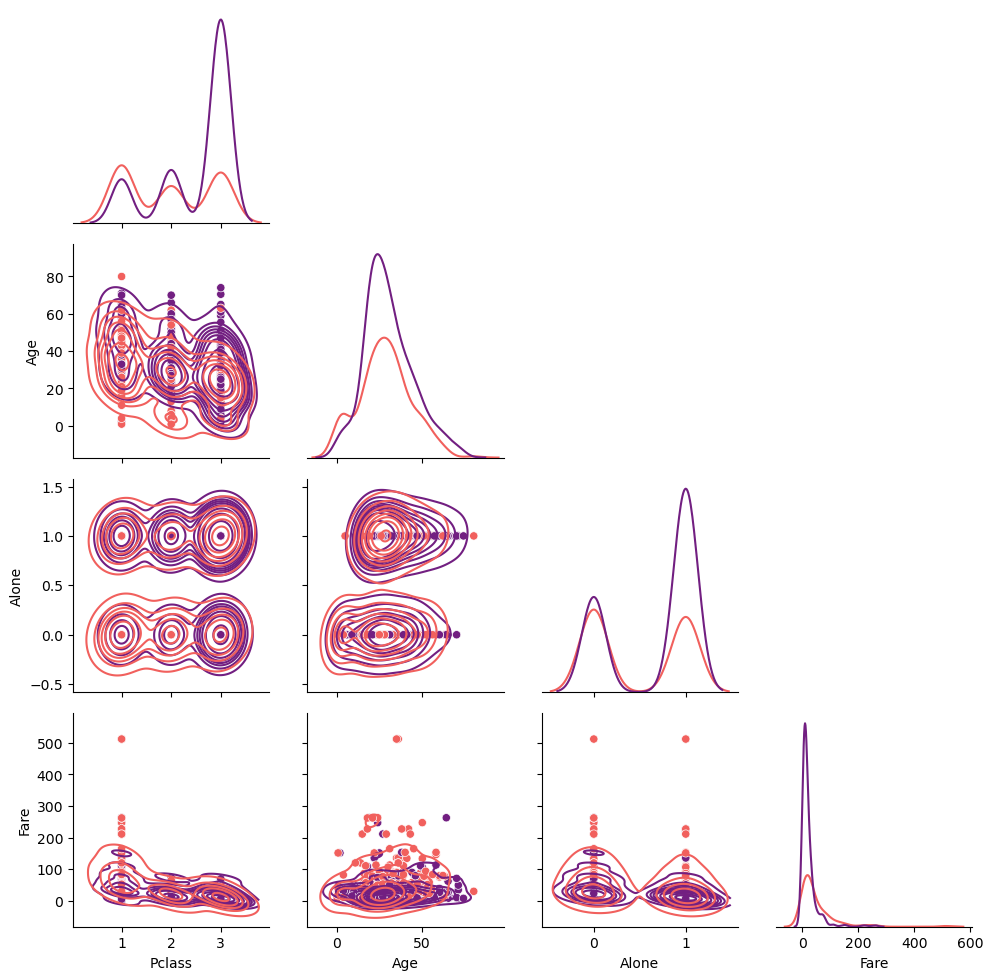

In [27]:
g = sns.PairGrid(df, hue='Survived',palette ='magma' , diag_sharey=False,corner =True)
g.map_lower(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
plt.show()

# Importing libraries from scikit-learn

In [28]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import *

### Numerical Processor 
> - Handling Missing value by imputing mean value
> - Bining the Age and Fare
> - Normalising the numerical column

In [29]:
print('Average Age :',df.Age.mean())
print('Average Fare :',df.Fare.mean())

Average Age : 29.69911764705882
Average Fare : 32.204207968574636


In [30]:
impute_mean = SimpleImputer(missing_values=np.nan,strategy="mean")
kbin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
sc = StandardScaler() 

numeric_processor=Pipeline(steps=[("imputation_mean",impute_mean),
                                   ("binning", kbin), ("scaler",sc)])
numeric_processor

Pipeline(steps=[('imputation_mean', SimpleImputer()),
                ('binning', KBinsDiscretizer(encode='ordinal')),
                ('scaler', StandardScaler())])

### Categorical Processor 
> - Handling Missing value by imputing most frequent value
> - Encoding the categorical value by One Hot Encoding

In [31]:
impute_mode = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
ohe = OneHotEncoder(handle_unknown= 'ignore')
categorical_processor=Pipeline(steps=[("imputation_mode",impute_mode),("OHE",ohe)])
categorical_processor

Pipeline(steps=[('imputation_mode', SimpleImputer(strategy='most_frequent')),
                ('OHE', OneHotEncoder(handle_unknown='ignore'))])

In [32]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([("categorical",categorical_processor,['Alone','Embarked','Pclass','Sex'] ),
                         ("numerical",numeric_processor,['Age','Fare'] )])


trf

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Alone', 'Embarked', 'Pclass', 'Sex']),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('binning',
                                                  KBinsDiscretizer(encode='ordinal')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare'])])

# Splitting into target and features

In [33]:
x = df.drop(columns=['Survived'])
y = df.Survived

# Train Test Splitting

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42,stratify=y)
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

# Building Pipeline with Logistic Regression

In [35]:
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline


from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
sc= StandardScaler()
smote= SMOTE()

clf = LogisticRegression()

steps =[ ('SMOTE', smote),
         ('Standard Scaler', sc),
         ('classifier', clf)]
pipeline_log = Pipeline(steps)
pipeline_log.fit(x_train_trf, y_train)


Pipeline(steps=[('SMOTE', SMOTE()), ('Standard Scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [36]:
y_pred_train = pipeline_log.predict(x_train_trf)
y_pred_test = pipeline_log.predict(x_test_trf)
acc_train_log = round(pipeline_log.score(x_train_trf, y_train) * 100, 2)
acc_test_log = round(pipeline_log.score(x_test_trf, y_test) * 100, 2)
#acc_test_log = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Training Accuracy :{acc_train_log}')
print(f'Test Accuracy: {acc_test_log}')
print(f'Variance :  {round((acc_train_log-acc_test_log),2)} ')

Training Accuracy :77.25
Test Accuracy: 77.09
Variance :  0.16 


# Building Pipeline with RandomForest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, )
steps =[ ('SMOTE', smote),
         ('Standard Scaler', sc),
         ('classifier', rfc)]
pipeline_rfc = Pipeline(steps)
pipeline_rfc.fit(x_train_trf, y_train)

Pipeline(steps=[('SMOTE', SMOTE()), ('Standard Scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [38]:
y_pred_train = pipeline_rfc.predict(x_train_trf)
y_pred_test = pipeline_rfc.predict(x_test_trf)
acc_train_rfc = round(pipeline_rfc.score(x_train_trf, y_train) * 100, 2)
acc_test_rfc = round(pipeline_rfc.score(x_test_trf, y_test) * 100, 2)
print(f'Training Accuracy :{acc_train_rfc}')
print(f'Test Accuracy: {acc_test_rfc}')
print(f'Variance :  {round((acc_train_rfc-acc_test_rfc),2)} ')

Training Accuracy :86.24
Test Accuracy: 79.33
Variance :  6.91 


# Building Pipeline with Support Vector Classifier

In [39]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf' )
steps =[ ('SMOTE', smote),
         ('Standard Scaler', sc),
         ('classifier', svc)]
pipeline_svc = Pipeline(steps)
pipeline_svc.fit(x_train_trf, y_train)

Pipeline(steps=[('SMOTE', SMOTE()), ('Standard Scaler', StandardScaler()),
                ('classifier', SVC())])

In [40]:
y_pred_train = pipeline_svc.predict(x_train_trf)
y_pred_test = pipeline_svc.predict(x_test_trf)
acc_train_svc = round(pipeline_svc.score(x_train_trf, y_train) * 100, 2)
acc_test_svc = round(pipeline_svc.score(x_test_trf, y_test) * 100, 2)
print(f'Training Accuracy :{acc_train_svc}')
print(f'Test Accuracy: {acc_test_svc}')
print(f'Variance :  {round((acc_train_rfc-acc_test_svc),2)} ')

Training Accuracy :81.32
Test Accuracy: 75.98
Variance :  10.26 
